In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline  


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import History
history = History()

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
#from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
 
import tensorflow as tf
import random as rn

#zipped image manipulation and converting image pixel value to numpy array
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from google.colab import files

Ref : https://www.tensorflow.org/tutorials/images/classification


In [2]:
data = files.upload()                                                       #file upload from local system

Saving archive.zip to archive.zip


Ref: https://stackoverflow.com/questions/49186905/loading-images-in-google-colab, 
https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [ ]:
!  unzip archive.zip                                                        #unzipping zipped files

Archive:  archive.zip
  inflating: caltech101_classification/Motorbikes/image_0001.jpg  
  inflating: caltech101_classification/Motorbikes/image_0002.jpg  
  inflating: caltech101_classification/Motorbikes/image_0003.jpg  
  inflating: caltech101_classification/Motorbikes/image_0004.jpg  
  inflating: caltech101_classification/Motorbikes/image_0005.jpg  
  inflating: caltech101_classification/Motorbikes/image_0006.jpg  
  inflating: caltech101_classification/Motorbikes/image_0007.jpg  
  inflating: caltech101_classification/Motorbikes/image_0008.jpg  
  inflating: caltech101_classification/Motorbikes/image_0009.jpg  
  inflating: caltech101_classification/Motorbikes/image_0010.jpg  
  inflating: caltech101_classification/Motorbikes/image_0011.jpg  
  inflating: caltech101_classification/Motorbikes/image_0012.jpg  
  inflating: caltech101_classification/Motorbikes/image_0013.jpg  
  inflating: caltech101_classification/Motorbikes/image_0014.jpg  
  inflating: caltech101_classification/M

In [ ]:
X=[]                                                                          #X -> for storing Image Pixel value
Y=[]                                                                          #Y -> for storing labels relevant to image
IMG_SIZE=150

Motorbikes_dir = '/content/caltech101_classification/Motorbikes'
airplanes_dir = '/content/caltech101_classification/airplanes'
schooners_dir = '/content/caltech101_classification/schooner'


Ref: https://www.kaggle.com/code/rajmehra03/flower-recognition-cnn-keras

In [ ]:
def assign_label(img,vehicle):                                                
    return vehicle
plt.rcParams['figure.figsize'] = (12,12)                            #setting dimensions for plot

In [ ]:
def make_train_data(vehicle, DIR):                                            #extracting image pixel values to img and then appending it in X
  for img in tqdm(os.listdir(DIR)):
    label = assign_label(img, vehicle)
    path = os.path.join(DIR, img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    Y.append(str(label))

Ref: https://www.kaggle.com/code/rajmehra03/flower-recognition-cnn-keras

In [ ]:
make_train_data('Airplane', airplanes_dir )                                                   #passing airplane to X
print(len(X)) 

100%|██████████| 800/800 [00:00<00:00, 1023.16it/s]

800


In [ ]:
make_train_data('Motobikes', Motorbikes_dir )                                                  #passing Motorbikes to X
print(len(X))

100%|██████████| 798/798 [00:00<00:00, 1432.92it/s]

1598


In [ ]:
make_train_data('schooners', schooners_dir )                                                    #passing Schooners to X
print(len(X))

100%|██████████| 63/63 [00:00<00:00, 880.98it/s]

1661


Ref: https://neptune.ai/blog/google-colab-dealing-with-files

Visualizing images

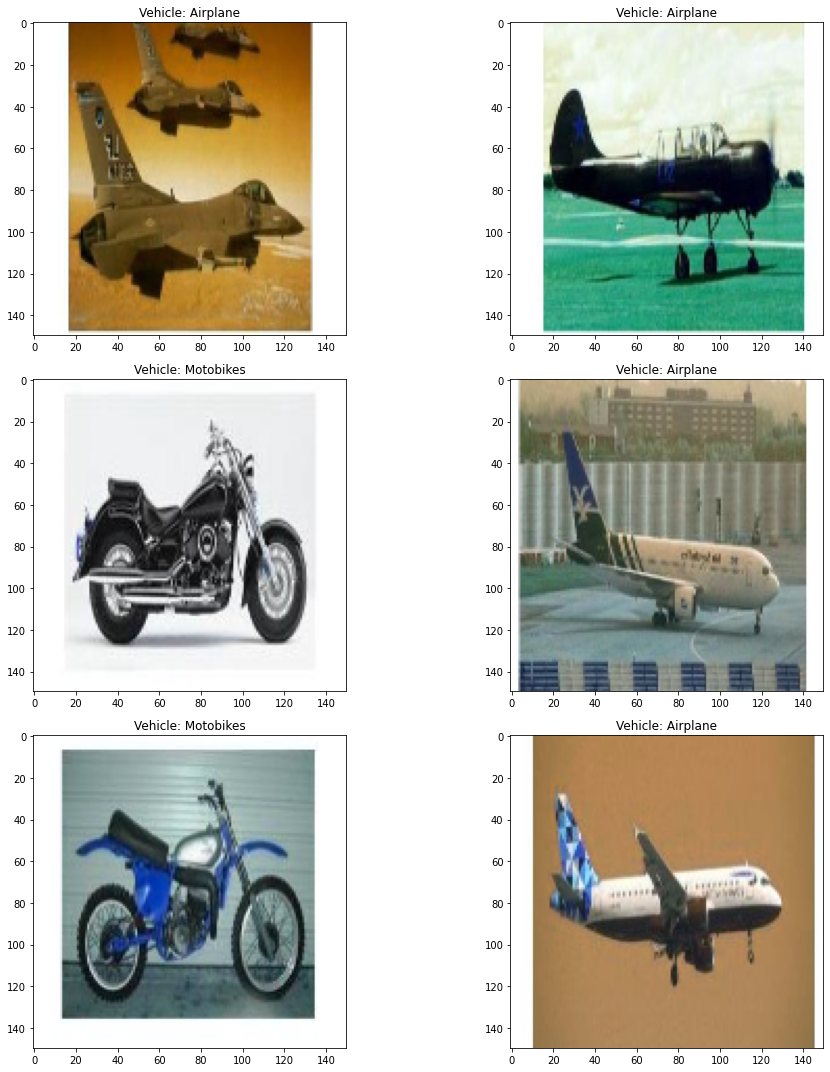

In [ ]:
fig, ax = plt.subplots(3,2)                                     #visualizing 2 images per dataset
fig.set_size_inches(15,15)
for i in range(3):
  for j in range(2):
    l = rn.randint(0, len(Y))
    ax[i,j].imshow(X[l])
    ax[i,j].set_title("Vehicle: "+Y[l])

plt.tight_layout()

In [ ]:
l = LabelEncoder()
Y = l.fit_transform(Y)
Y = to_categorical(Y,3)
X = np.array(X)
X = X/255                                           #sclaing the pixel values

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)      #splitting it in 80:20 ratio

In [ ]:
ACCURACY = []                                                             
n_epochs = 10                                                       #20 epochs
print("Xtrain", len(X_train))
print("Xtest", len(X_test))
print("ytrain", len(y_train))
print("ytest", len(y_test))

Xtrain 1328
Xtest 333
ytrain 1328
ytest 333


In [ ]:
train_datagen = ImageDataGenerator(                                                     #Image Data Generator creation for filters.
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    rotation_range = 40)

In [ ]:
train_datagen.fit(X_train)                                                          #fitting the training data on Image Data Generator

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html , 
https://keras.io/api/preprocessing/image/   

Sequential Models

model 1

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape=(150,150,3)))
model1.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model1.add(Conv2D(filters = 16,  kernel_size = (5,5),padding = 'Same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model1.add( Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same',activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model1.add( Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dense(3, activation = 'softmax'))

In [ ]:
model1.compile(optimizer=Adam(lr = 0.001),                                                #compiling model
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
Hist1 = model1.fit_generator(train_datagen.flow(X_train, y_train, batch_size = 16),       
                           validation_data = (X_test, y_test),
                           verbose = 1,  steps_per_epoch = X_train.shape[0]//16,
                           epochs = n_epochs)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
83/83 [==============================] - 8s 83ms/step - loss: 0.7321 - accuracy: 0.6619 - val_loss: 0.4683 - val_accuracy: 0.8769
Epoch 2/10
83/83 [==============================] - 7s 79ms/step - loss: 0.5193 - accuracy: 0.8140 - val_loss: 0.4278 - val_accuracy: 0.8979
Epoch 3/10
83/83 [==============================] - 7s 80ms/step - loss: 0.5448 - accuracy: 0.8110 - val_loss: 0.4391 - val_accuracy: 0.8529
Epoch 4/10
83/83 [==============================] - 7s 81ms/step - loss: 0.4163 - accuracy: 0.8614 - val_loss: 0.3186 - val_accuracy: 0.8919
Epoch 5/10
83/83 [==============================] - 7s 80ms/step - loss: 0.3414 - accuracy: 0.8795 - val_loss: 0.1970 - val_accuracy: 0.9219
Epoch 6/10
83/83 [==============================] - 7s 79ms/step - loss: 0.2956 - accuracy: 0.8976 - val_loss: 0.2469 - val_accuracy: 0.9189
Epoch 7/10
83/83 [==============================] - 7s 81ms/step - loss: 0.2574 - accuracy: 0.9089 - val_loss: 0.1389 - val_accuracy: 0.9429
Epoch 8/10
83

Ref: https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/

In [ ]:
ACCURACY, VAL_ACC=[], []                                                    #Storing Accuracy and Loss
acc1 = Hist1.history['accuracy']
val_acc1 = Hist1.history['val_accuracy']
loss1 = Hist1.history['loss']
val_loss1 = Hist1.history['val_loss']
ACCURACY.append(max(acc1))
VAL_ACC.append(max(val_acc1))
# print(acc1, val_acc1)
# print(ACCURACY, VAL_ACC)

In [ ]:
print(max(acc1))

0.9299699068069458


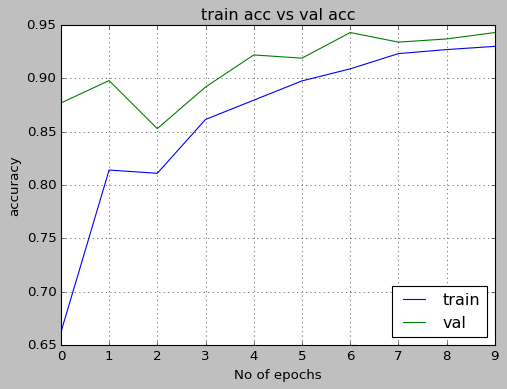

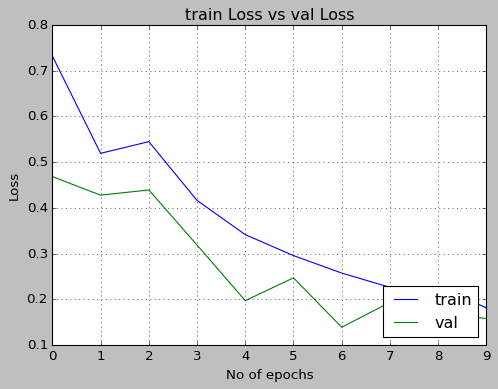

In [ ]:
e = range(n_epochs)                                                                       #plotting training accuracy and loss
plt.figure(1, figsize=(7,5))                                                              #plotting validation accuracy and loss
plt.plot(e, acc1)
plt.plot(e, val_acc1 )
plt.xlabel("No of epochs")
plt.ylabel("accuracy")
plt.title("train acc vs val acc")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])

plt.figure(2, figsize=(7,5))
plt.plot(e, loss1)
plt.plot(e, val_loss1)
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.title("train Loss vs val Loss")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])


Ref: https://www.youtube.com/watch?v=9pDlJ5aAFN4     

model 2

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape=(150,150,3)))
model2.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model2.add(Conv2D(filters = 32,  kernel_size = (3,3),padding = 'Same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model2.add( Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same',activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model2.add( Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(3, activation = 'softmax'))
#92.49

In [ ]:
model2.compile(optimizer=Adam(lr = 0.001), 
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
Hist2 = model2.fit_generator(train_datagen.flow(X_train, y_train, batch_size = 16), 
                           validation_data = (X_test, y_test),
                           verbose = 1,  steps_per_epoch = X_train.shape[0]//16,
                           epochs = n_epochs)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


83/83 [==============================] - 8s 84ms/step - loss: 0.6128 - accuracy: 0.7026 - val_loss: 0.4566 - val_accuracy: 0.8709
Epoch 2/10
83/83 [==============================] - 7s 82ms/step - loss: 0.3224 - accuracy: 0.8878 - val_loss: 0.2657 - val_accuracy: 0.9129
Epoch 3/10
83/83 [==============================] - 7s 81ms/step - loss: 0.2657 - accuracy: 0.9172 - val_loss: 0.1662 - val_accuracy: 0.9459
Epoch 4/10
83/83 [==============================] - 7s 81ms/step - loss: 0.2320 - accuracy: 0.9111 - val_loss: 0.2090 - val_accuracy: 0.9309
Epoch 5/10
83/83 [==============================] - 7s 81ms/step - loss: 0.1894 - accuracy: 0.9337 - val_loss: 0.1368 - val_accuracy: 0.9670
Epoch 6/10
83/83 [==============================] - 7s 82ms/step - loss: 0.2223 - accuracy: 0.9202 - val_loss: 0.2033 - val_accuracy: 0.9339
Epoch 7/10
83/83 [==============================] - 7s 81ms/step - loss: 0.1679 - accuracy: 0.9435 - val_loss: 0.3038 - val_accuracy: 0.9039
Epoch 8/10
83/83 [======

In [ ]:
acc2 = Hist2.history['accuracy']
val_acc2 = Hist2.history['val_accuracy']
loss2= Hist2.history['loss']
val_loss2 = Hist2.history['val_loss']
ACCURACY.append(max(acc2))
VAL_ACC.append(max(val_acc2))

In [ ]:
print(max(acc1))

0.9299699068069458


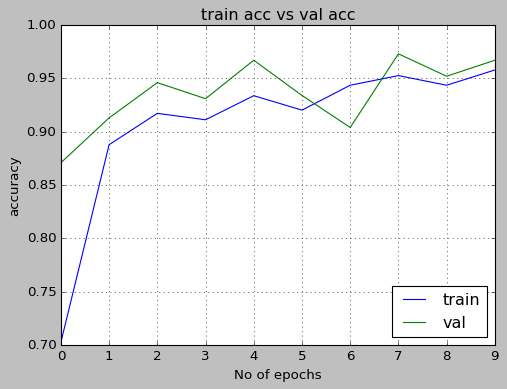

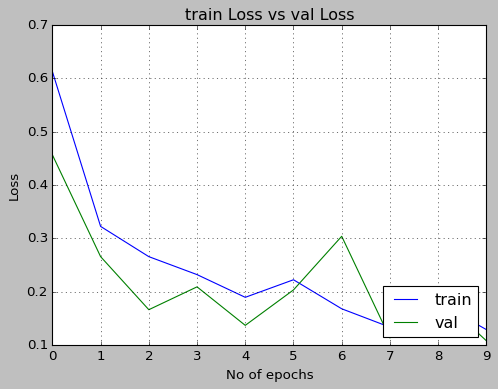

In [ ]:
plt.figure(1, figsize=(7,5))
plt.plot(e, acc2)
plt.plot(e, val_acc2 )
plt.xlabel("No of epochs")
plt.ylabel("accuracy")
plt.title("train acc vs val acc")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])

plt.figure(2, figsize=(7,5))
plt.plot(e, loss2)
plt.plot(e, val_loss2)
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.title("train Loss vs val Loss")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])

model 3

In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape=(150,150,3)))
model3.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model3.add(Conv2D(filters = 64,  kernel_size = (3,3),padding = 'Same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model3.add( Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same',activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model3.add( Conv2D(filters = 256, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dense(3, activation = 'softmax'))

In [ ]:
model3.compile(optimizer=Adam(lr = 0.001), 
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
Hist3 = model3.fit_generator(train_datagen.flow(X_train, y_train, batch_size = 16), 
                           validation_data = (X_test, y_test),
                           verbose = 1,  steps_per_epoch = X_train.shape[0]//16,
                           epochs = n_epochs)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


83/83 [==============================] - 8s 90ms/step - loss: 0.6768 - accuracy: 0.7048 - val_loss: 0.3749 - val_accuracy: 0.8829
Epoch 2/10
83/83 [==============================] - 7s 85ms/step - loss: 0.3478 - accuracy: 0.8795 - val_loss: 0.3223 - val_accuracy: 0.8919
Epoch 3/10
83/83 [==============================] - 8s 94ms/step - loss: 0.2462 - accuracy: 0.9194 - val_loss: 0.2282 - val_accuracy: 0.9249
Epoch 4/10
83/83 [==============================] - 7s 85ms/step - loss: 0.2199 - accuracy: 0.9202 - val_loss: 0.2305 - val_accuracy: 0.9399
Epoch 5/10
83/83 [==============================] - 7s 85ms/step - loss: 0.2028 - accuracy: 0.9315 - val_loss: 0.1411 - val_accuracy: 0.9670
Epoch 6/10
83/83 [==============================] - 7s 85ms/step - loss: 0.1904 - accuracy: 0.9345 - val_loss: 0.1371 - val_accuracy: 0.9520
Epoch 7/10
83/83 [==============================] - 8s 101ms/step - loss: 0.1849 - accuracy: 0.9390 - val_loss: 0.2348 - val_accuracy: 0.9369
Epoch 8/10
83/83 [=====

In [ ]:
acc3 = Hist3.history['accuracy']
val_acc3 = Hist3.history['val_accuracy']
loss3 = Hist3.history['loss']
val_loss3 = Hist3.history['val_loss']
ACCURACY.append(max(acc3))
VAL_ACC.append(max(val_acc3))

In [ ]:
print(max(acc3))

0.9638554453849792


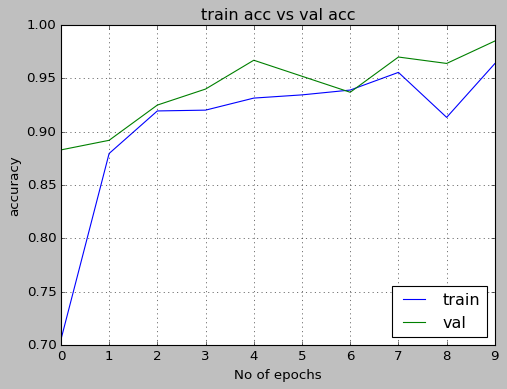

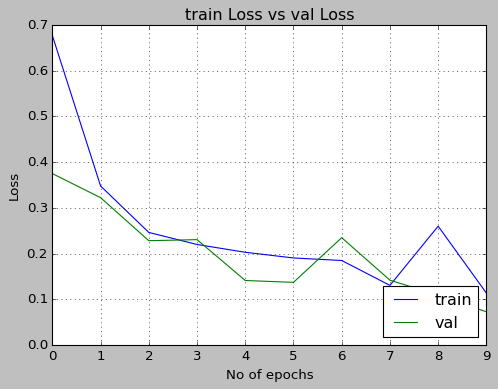

In [ ]:
plt.figure(1, figsize=(7,5))
plt.plot(e, acc3)
plt.plot(e, val_acc3 )
plt.xlabel("No of epochs")
plt.ylabel("accuracy")
plt.title("train acc vs val acc")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])

plt.figure(2, figsize=(7,5))
plt.plot(e, loss3)
plt.plot(e, val_loss3)
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.title("train Loss vs val Loss")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])

In [ ]:
model4 = Sequential()
model4.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape=(150,150,3)))
model4.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model4.add(Conv2D(filters = 64,  kernel_size = (3,3),padding = 'Same', activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model4.add( Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same',activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dense(3, activation = 'softmax'))

In [ ]:
model4.compile(optimizer=Adam(lr = 0.001), 
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
Hist4 = model4.fit_generator(train_datagen.flow(X_train, y_train, batch_size = 16), 
                           validation_data = (X_test, y_test),
                           verbose = 1,  steps_per_epoch = X_train.shape[0]//16,
                           epochs = n_epochs)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


83/83 [==============================] - 14s 96ms/step - loss: 0.5532 - accuracy: 0.8163 - val_loss: 0.2493 - val_accuracy: 0.9279
Epoch 2/10
83/83 [==============================] - 7s 88ms/step - loss: 0.2762 - accuracy: 0.9104 - val_loss: 0.1848 - val_accuracy: 0.9399
Epoch 3/10
83/83 [==============================] - 7s 85ms/step - loss: 0.2279 - accuracy: 0.9239 - val_loss: 0.1555 - val_accuracy: 0.9580
Epoch 4/10
83/83 [==============================] - 7s 86ms/step - loss: 0.2120 - accuracy: 0.9217 - val_loss: 0.1233 - val_accuracy: 0.9700
Epoch 5/10
83/83 [==============================] - 7s 86ms/step - loss: 0.1751 - accuracy: 0.9375 - val_loss: 0.1072 - val_accuracy: 0.9670
Epoch 6/10
83/83 [==============================] - 7s 84ms/step - loss: 0.1719 - accuracy: 0.9285 - val_loss: 0.1288 - val_accuracy: 0.9670
Epoch 7/10
83/83 [==============================] - 7s 86ms/step - loss: 0.1084 - accuracy: 0.9616 - val_loss: 0.1683 - val_accuracy: 0.9489
Epoch 8/10
83/83 [=====

In [ ]:
acc4 = Hist4.history['accuracy']
val_acc4 = Hist4.history['val_accuracy']
loss4 = Hist4.history['loss']
val_loss4 = Hist4.history['val_loss']
ACCURACY.append(max(acc4))
VAL_ACC.append(max(val_acc4))

In [ ]:
print(max(acc4))

0.9615963697433472


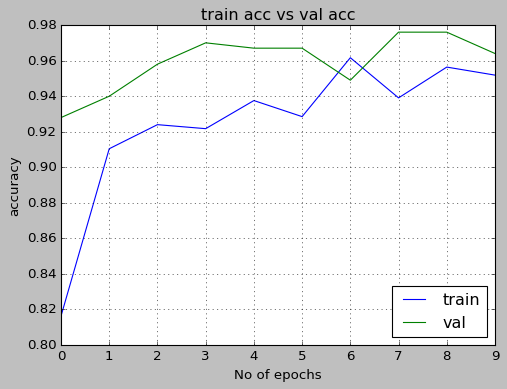

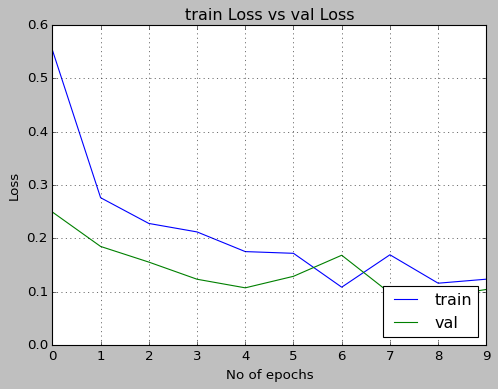

In [ ]:
plt.figure(1, figsize=(7,5))
plt.plot(e, acc4)
plt.plot(e, val_acc4 )
plt.xlabel("No of epochs")
plt.ylabel("accuracy")
plt.title("train acc vs val acc")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])

plt.figure(2, figsize=(7,5))
plt.plot(e, loss4)
plt.plot(e, val_loss4)
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.title("train Loss vs val Loss")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])

In [ ]:
model5 = Sequential()
model5.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)))
model5.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model5.add(Conv2D(filters = 8,  kernel_size = (3,3), activation = 'relu'))
model5.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

# model5.add( Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same',activation = 'relu'))
# model5.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dense(3, activation = 'softmax'))

In [ ]:
model5.compile(optimizer=Adam(lr = 0.01), 
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
Hist5 = model5.fit_generator(train_datagen.flow(X_train, y_train, batch_size = 16), 
                           validation_data = (X_test, y_test),
                           verbose = 1,  steps_per_epoch = X_train.shape[0]//16,
                           epochs = n_epochs)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


83/83 [==============================] - 7s 83ms/step - loss: 1.1915 - accuracy: 0.5120 - val_loss: 0.8318 - val_accuracy: 0.4384
Epoch 2/10
83/83 [==============================] - 7s 80ms/step - loss: 0.8317 - accuracy: 0.4676 - val_loss: 0.8393 - val_accuracy: 0.4384
Epoch 3/10
83/83 [==============================] - 7s 79ms/step - loss: 0.8333 - accuracy: 0.4661 - val_loss: 0.8449 - val_accuracy: 0.4384
Epoch 4/10
83/83 [==============================] - 7s 80ms/step - loss: 0.8355 - accuracy: 0.4661 - val_loss: 0.8299 - val_accuracy: 0.5225
Epoch 5/10
83/83 [==============================] - 7s 80ms/step - loss: 0.8347 - accuracy: 0.4985 - val_loss: 0.8385 - val_accuracy: 0.4384
Epoch 6/10
83/83 [==============================] - 7s 81ms/step - loss: 0.8356 - accuracy: 0.4684 - val_loss: 0.8338 - val_accuracy: 0.5225
Epoch 7/10
83/83 [==============================] - 7s 80ms/step - loss: 0.8333 - accuracy: 0.4857 - val_loss: 0.8500 - val_accuracy: 0.4384
Epoch 8/10
83/83 [======

In [ ]:
acc5 = Hist5.history['accuracy']
val_acc5 = Hist5.history['val_accuracy']
loss5 = Hist5.history['loss']
val_loss5 = Hist5.history['val_loss']
ACCURACY.append(max(acc5))
VAL_ACC.append(max(val_acc5))

In [ ]:
print(max(acc5))

0.5120481848716736


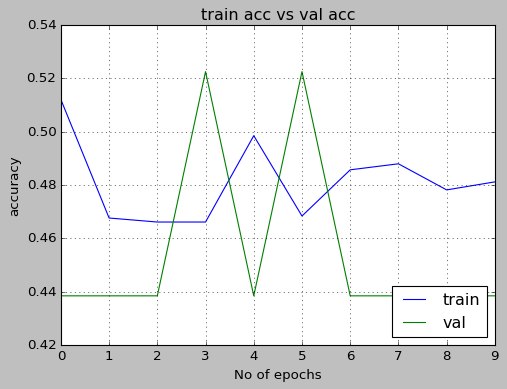

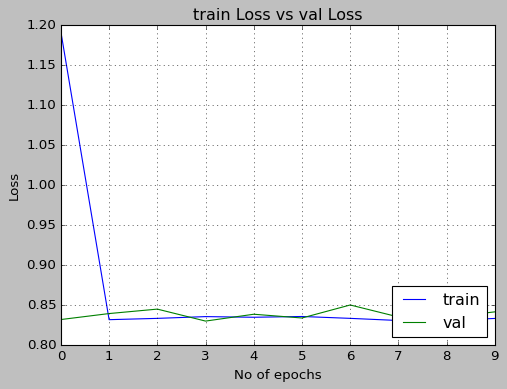

In [ ]:
plt.figure(1, figsize=(7,5))
plt.plot(e, acc5)
plt.plot(e, val_acc5 )
plt.xlabel("No of epochs")
plt.ylabel("accuracy")
plt.title("train acc vs val acc")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])

plt.figure(2, figsize=(7,5))
plt.plot(e, loss5)
plt.plot(e, val_loss5)
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.title("train Loss vs val Loss")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])

In [ ]:
model6 = Sequential()
model6.add(Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)))
model6.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

# model6.add(Conv2D(filters = 64,  kernel_size = (3,3), activation = 'relu'))
# model6.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

# model5.add( Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same',activation = 'relu'))
# model5.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model6.add(Flatten())
model6.add(Dense(512))
model6.add(Activation('relu'))
model6.add(Dense(3, activation = 'softmax'))

In [ ]:
model6.compile(optimizer=Adam(lr = 0.001), 
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
Hist6 = model6.fit_generator(train_datagen.flow(X_train, y_train, batch_size = 16), 
                           validation_data = (X_test, y_test),
                           verbose = 1,  steps_per_epoch = X_train.shape[0]//16,
                           epochs = n_epochs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
83/83 [==============================] - 8s 94ms/step - loss: 0.1884 - accuracy: 0.9307 - val_loss: 0.2211 - val_accuracy: 0.9520
Epoch 2/10
83/83 [==============================] - 7s 80ms/step - loss: 0.1900 - accuracy: 0.9352 - val_loss: 0.2673 - val_accuracy: 0.9399
Epoch 3/10
83/83 [==============================] - 7s 82ms/step - loss: 0.1896 - accuracy: 0.9330 - val_loss: 0.1756 - val_accuracy: 0.9520
Epoch 4/10
83/83 [==============================] - 7s 81ms/step - loss: 0.1788 - accuracy: 0.9300 - val_loss: 0.1910 - val_accuracy: 0.9459
Epoch 5/10
83/83 [==============================] - 7s 86ms/step - loss: 0.1588 - accuracy: 0.9413 - val_loss: 0.5135 - val_accuracy: 0.8919
Epoch 6/10
83/83 [==============================] - 7s 82ms/step - loss: 0.1732 - accuracy: 0.9435 - val_loss: 0.1959 - val_accuracy: 0.9550
Epoch 7/10
83/83 [==============================] - 7s 81ms/step - loss: 0.1544 - accuracy: 0.9503 - val_loss: 0.2741 - val_accuracy: 0.9399
Epoch 8/10
83

In [ ]:
acc6 = Hist6.history['accuracy']
val_acc6 = Hist6.history['val_accuracy']
loss6 = Hist6.history['loss']
val_loss6 = Hist6.history['val_loss']
ACCURACY.append(max(acc6))
VAL_ACC.append(max(val_acc6))

In [ ]:
print(max(acc6))

0.9548192620277405


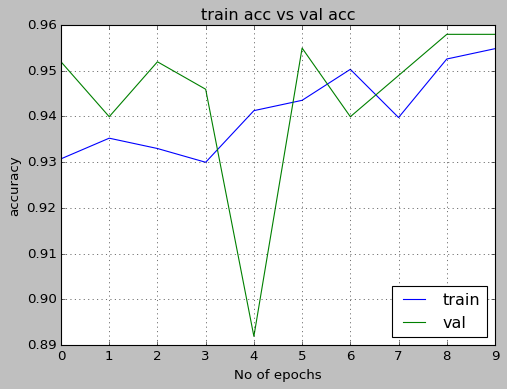

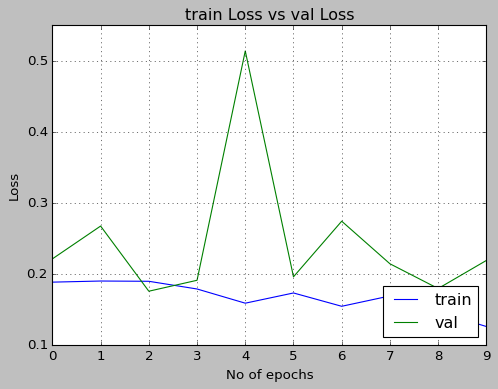

In [ ]:
plt.figure(1, figsize=(7,5))
plt.plot(e, acc6)
plt.plot(e, val_acc6 )
plt.xlabel("No of epochs")
plt.ylabel("accuracy")
plt.title("train acc vs val acc")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])

plt.figure(2, figsize=(7,5))
plt.plot(e, loss6)
plt.plot(e, val_loss6)
plt.xlabel("No of epochs")
plt.ylabel("Loss")
plt.title("train Loss vs val Loss")
plt.grid(True)
plt.legend(['train', 'val'], loc = 4)

plt.style.use(['classic'])

In [ ]:
print(ACCURACY)

[0.9299699068069458, 0.9578313231468201, 0.9638554453849792, 0.9615963697433472, 0.5120481848716736, 0.9548192620277405]


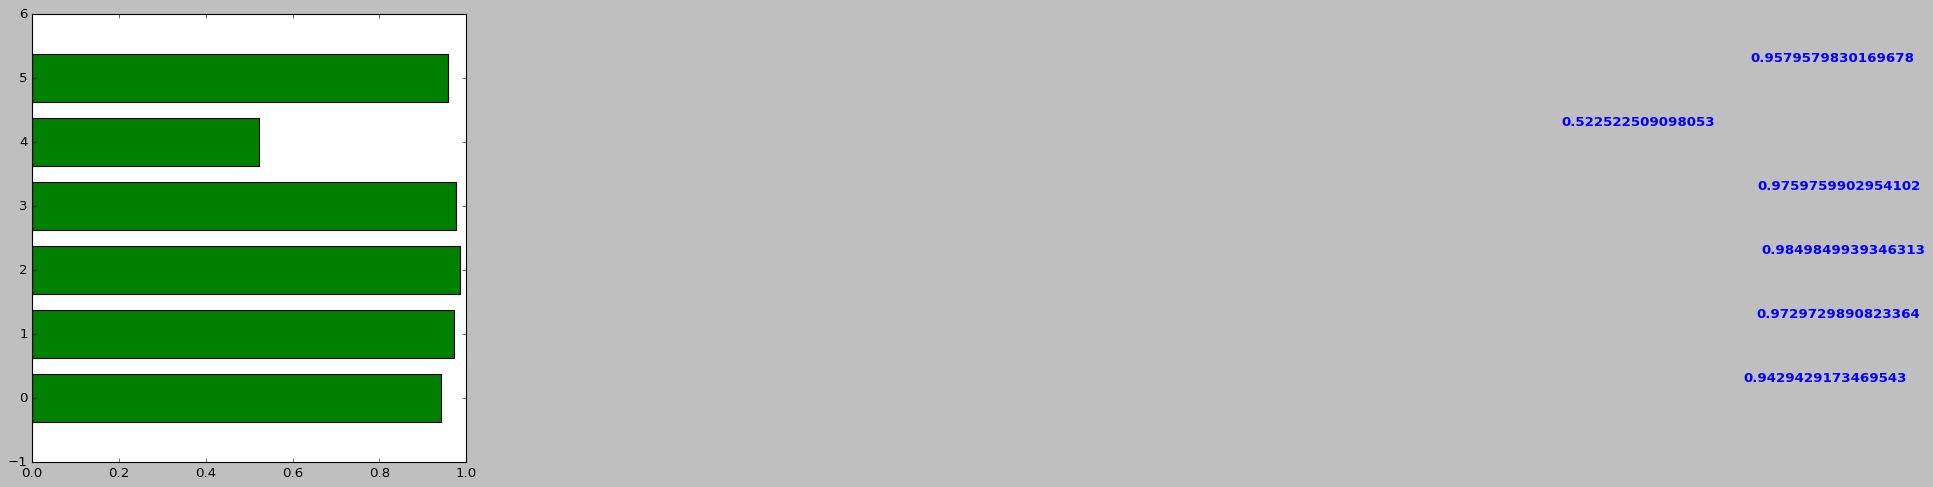

In [ ]:
plt.rcParams['figure.figsize'] = (7,7)   #setting dimensions for plot
X = ["Model1", "Model2", "Model3", "Model4", "Model5", "Model6"]
Height = VAL_ACC
fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(Height))
ax.barh(ind, Height, width, color = 'green')
for i, v in enumerate(Height):
    ax.text(v + 3, i + .25, str(v),
            color = 'blue', fontweight = 'bold')
plt.show()
# plt.bar(X,Height)
# plt.title("Model Accuracies")

Ref: https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

Model 2 is the best in all the models as it gives us the best accuracy of 99%